In [1]:
# Import the dpeendencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c7e7e7214cac6abdccd968616b5eabe6


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c7e7e7214cac6abdccd968616b5eabe6&q=Boston


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather.status_code

200

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"base":"stations","main":{"temp":77.18,"feels_like":77.32,"temp_min":73.4,"temp_max":80.01,"pressure":1013,"humidity":73},"visibility":16093,"wind":{"speed":11.41,"deg":70},"rain":{"1h":0.25},"clouds":{"all":40},"dt":1594746967,"sys":{"type":1,"id":3486,"country":"US","sunrise":1594718411,"sunset":1594772382},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 77.18,
  'feels_like': 77.32,
  'temp_min': 73.4,
  'temp_max': 80.01,
  'pressure': 1013,
  'humidity': 73},
 'visibility': 16093,
 'wind': {'speed': 11.41, 'deg': 70},
 'rain': {'1h': 0.25},
 'clouds': {'all': 40},
 'dt': 1594746967,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1594718411,
  'sunset': 1594772382},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c7e7e7214cac6abdccd968616b5eabe6&q=Boston


In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 77.18,
  'feels_like': 77.32,
  'temp_min': 73.4,
  'temp_max': 80.01,
  'pressure': 1013,
  'humidity': 73},
 'visibility': 16093,
 'wind': {'speed': 11.41, 'deg': 70},
 'rain': {'1h': 0.25},
 'clouds': {'all': 40},
 'dt': 1594746967,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1594718411,
  'sunset': 1594772382},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()

In [19]:
boston_data["sys"]["country"]

'US'

In [20]:
boston_data["dt"]

1594746967

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 80.01 73 40 11.41


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-07-14 17:16:07'

In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bubaque
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | homnabad
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | baiyin
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | charters towers
Processing Record 17 of Set 1 | dargaville
Processing Record 18 of Set 1 | ahuimanu
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | tazovskiy
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | tuktoyaktuk
Processing Record 24 of Set 1 | nizhneyansk
City not f

Processing Record 42 of Set 4 | te anau
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | ambilobe
Processing Record 45 of Set 4 | port blair
Processing Record 46 of Set 4 | mogadishu
Processing Record 47 of Set 4 | kuminskiy
Processing Record 48 of Set 4 | outlook
Processing Record 49 of Set 4 | sorvag
City not found. Skipping...
Processing Record 50 of Set 4 | zunyi
Processing Record 1 of Set 5 | baijiantan
Processing Record 2 of Set 5 | anjiang
Processing Record 3 of Set 5 | phan rang
City not found. Skipping...
Processing Record 4 of Set 5 | faanui
Processing Record 5 of Set 5 | marienburg
Processing Record 6 of Set 5 | puerto padre
Processing Record 7 of Set 5 | santiago del estero
Processing Record 8 of Set 5 | pevek
Processing Record 9 of Set 5 | misratah
Processing Record 10 of Set 5 | stutterheim
Processing Record 11 of Set 5 | longyearbyen
Processing Record 12 of Set 5 | souillac
Processing Record 13 of Set 5 | buriti dos lopes
Processing Record 14 of S

Processing Record 35 of Set 8 | mayumba
Processing Record 36 of Set 8 | dharchula
Processing Record 37 of Set 8 | miranda de ebro
Processing Record 38 of Set 8 | moyale
Processing Record 39 of Set 8 | unai
Processing Record 40 of Set 8 | tawkar
City not found. Skipping...
Processing Record 41 of Set 8 | aklavik
Processing Record 42 of Set 8 | riyadh
Processing Record 43 of Set 8 | mayo
Processing Record 44 of Set 8 | dingle
Processing Record 45 of Set 8 | tomball
Processing Record 46 of Set 8 | port hardy
Processing Record 47 of Set 8 | novobiryusinskiy
Processing Record 48 of Set 8 | lubao
Processing Record 49 of Set 8 | sao felix do xingu
Processing Record 50 of Set 8 | kahului
Processing Record 1 of Set 9 | zaraza
Processing Record 2 of Set 9 | port moresby
Processing Record 3 of Set 9 | leningradskiy
Processing Record 4 of Set 9 | stephenville
Processing Record 5 of Set 9 | gimbi
Processing Record 6 of Set 9 | tarakan
Processing Record 7 of Set 9 | nguiu
City not found. Skipping...

Processing Record 24 of Set 12 | hervey bay
Processing Record 25 of Set 12 | kerteh
City not found. Skipping...
Processing Record 26 of Set 12 | montepuez
Processing Record 27 of Set 12 | boguchany
Processing Record 28 of Set 12 | pesca
Processing Record 29 of Set 12 | cabedelo
Processing Record 30 of Set 12 | gasa
Processing Record 31 of Set 12 | yumen
Processing Record 32 of Set 12 | guadix
Processing Record 33 of Set 12 | westpunt
City not found. Skipping...
Processing Record 34 of Set 12 | brownsville
Processing Record 35 of Set 12 | lago da pedra
Processing Record 36 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 37 of Set 12 | bothell
Processing Record 38 of Set 12 | barra do garcas
Processing Record 39 of Set 12 | mandera
Processing Record 40 of Set 12 | ibia
Processing Record 41 of Set 12 | otavi
Processing Record 42 of Set 12 | saint-joseph
Processing Record 43 of Set 12 | aitape
Processing Record 44 of Set 12 | ocos
Processing Record 45 of Set 12 | iber

In [27]:
# Reorder the columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [28]:
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bubaque,GW,2020-07-14 17:18:54,11.28,-15.83,81.05,84,100,14.36
1,Vaini,TO,2020-07-14 17:18:54,-21.20,-175.20,69.80,77,40,9.17
2,Albany,US,2020-07-14 17:15:22,42.60,-73.97,82.99,57,0,7.92
3,Busselton,AU,2020-07-14 17:18:55,-33.65,115.33,48.99,76,100,10.29
4,Homnabad,IN,2020-07-14 17:18:55,17.77,77.13,73.72,92,100,9.26
5,Hithadhoo,MV,2020-07-14 17:18:55,-0.60,73.08,85.39,68,66,3.87
6,Ribeira Grande,PT,2020-07-14 17:18:55,38.52,-28.70,75.20,69,20,12.75
7,Baiyin,CN,2020-07-14 17:18:55,36.56,104.21,71.01,100,0,2.24
8,East London,ZA,2020-07-14 17:18:55,-33.02,27.91,55.96,65,81,25.70
9,Mataura,NZ,2020-07-14 17:18:55,-46.19,168.86,39.00,83,53,3.00


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module
import time

In [32]:
today = time.strftime("%x")
today

'07/14/20'

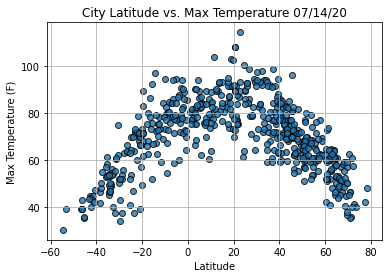

In [33]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

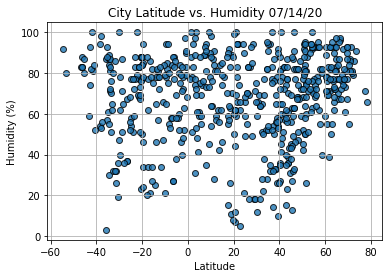

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

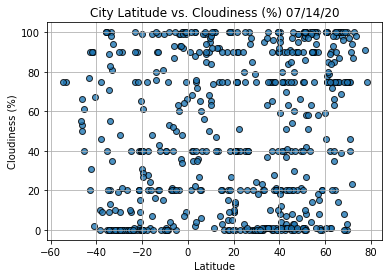

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

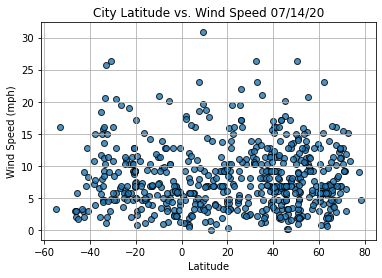

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City                       Avarua
Country                        CK
Date          2020-07-14 17:18:56
Lat                        -21.21
Lng                       -159.78
Max Temp                       68
Humidity                       68
Cloudiness                      1
Wind Speed                    4.7
Name: 13, dtype: object

In [39]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bubaque,GW,2020-07-14 17:18:54,11.28,-15.83,81.05,84,100,14.36
2,Albany,US,2020-07-14 17:15:22,42.60,-73.97,82.99,57,0,7.92
4,Homnabad,IN,2020-07-14 17:18:55,17.77,77.13,73.72,92,100,9.26
6,Ribeira Grande,PT,2020-07-14 17:18:55,38.52,-28.70,75.20,69,20,12.75
7,Baiyin,CN,2020-07-14 17:18:55,36.56,104.21,71.01,100,0,2.24


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [42]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

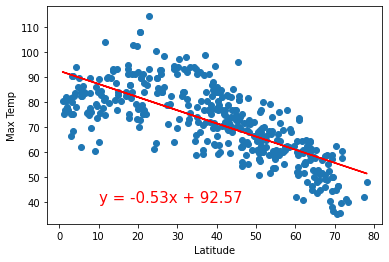

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

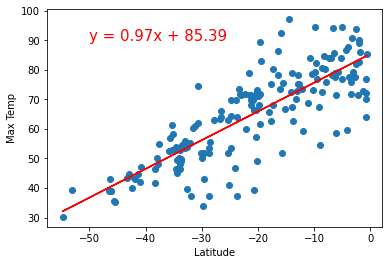

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

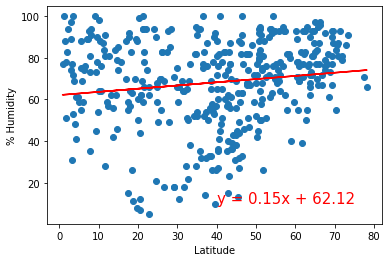

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

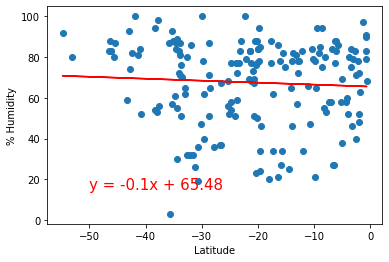

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

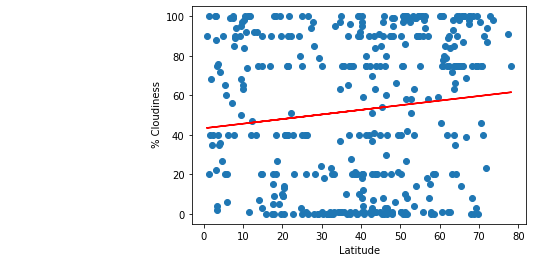

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values =  northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \n for Cloudiness', ' % Cloudiness', (-50, 15))

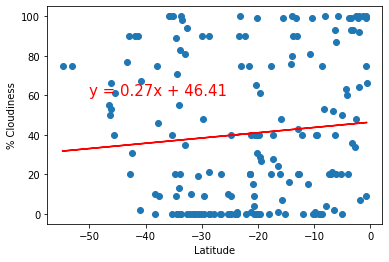

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

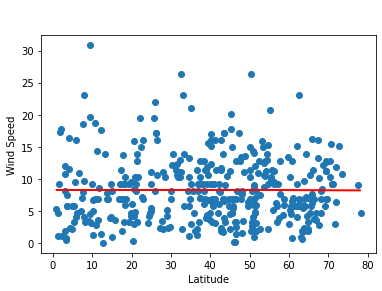

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

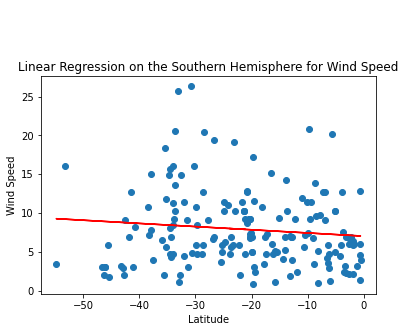

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.title(f"Linear Regression on the Southern Hemisphere for Wind Speed")
plt.ylabel("Wind Speed ((mph)")
plt.xlabel("Latitude")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

plt.show()